# Проект <b>"Определение стоимости автомобилей".</b>

**<i>Цель: Разработать модель прогнозирующую стоимость автомобиля. </i>**

**Задачами проекта являются:**
1. Выбрать модель прогнозирования стоимости автомобиля с учетом:
    - качества прогнозирования;
    - скрости обучения и прогнозирования.

**Объектом исследования является датасеты со статистикой объявлений по продаже автомобилей.** 

**Проект выполняется в основных этапов:**
1. Загрузка и предварительный обзор данных.
2. Предобработка данных.
3. Подготовка обучающих и тренировочных таблиц.
4. Применение модели регрессий для описания исходных данных.
5. Анализ моделей.
6. Общий выввод.

## Загрузка и предварительный обзор данных

In [3]:
# Импорт библиотек, классов и методов
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.linear_model import  LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, LogisticRegression
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR, NuSVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler 
pd.options.mode.chained_assignment = None
#from sklearn.utils import shuffle
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import time
import catboost as cb
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

## Подготовка данных

In [5]:
#Загрузка данных
try:
    df = pd.read_csv('/content/drive/MyDrive/autos/autos.csv', parse_dates=[0, 12, 15])
    
except:
    df = pd.read_csv('/datasets/autos.csv', parse_dates=[0, 12, 15])

In [6]:
# Вывод общей информации и первых пяти строк датафрейма.
#print("\033[1m" 'Общая информация по датафрейму data и вывод первых пяти строк', "\033[0m")
df.info()
#display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354369 non-null  datetime64[ns]
 1   Price              354369 non-null  int64         
 2   VehicleType        316879 non-null  object        
 3   RegistrationYear   354369 non-null  int64         
 4   Gearbox            334536 non-null  object        
 5   Power              354369 non-null  int64         
 6   Model              334664 non-null  object        
 7   Kilometer          354369 non-null  int64         
 8   RegistrationMonth  354369 non-null  int64         
 9   FuelType           321474 non-null  object        
 10  Brand              354369 non-null  object        
 11  NotRepaired        283215 non-null  object        
 12  DateCreated        354369 non-null  datetime64[ns]
 13  NumberOfPictures   354369 non-null  int64   

In [7]:
df.describe(include='all')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
count,354369,354369.000000,316879,354369.000000,334536,354369.000000,334664,354369.000000,354369.000000,321474,354369,283215,354369,354369.0,354369.000000,354369
unique,271174,NaN,8,NaN,2,NaN,250,NaN,NaN,7,40,2,109,NaN,NaN,179150
top,2016-03-24 14:49:47,NaN,sedan,NaN,manual,NaN,golf,NaN,NaN,petrol,volkswagen,no,2016-04-03 00:00:00,NaN,NaN,2016-04-06 13:45:54
freq,7,NaN,91457,NaN,268251,NaN,29232,NaN,NaN,216352,77013,247161,13719,NaN,NaN,17
first,2016-03-05 14:06:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-10 00:00:00,NaN,NaN,2016-03-05 14:15:08
last,2016-04-07 14:36:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-07 00:00:00,NaN,NaN,2016-04-07 14:58:51
mean,NaN,4416.656776,NaN,2004.234448,NaN,110.094337,NaN,128211.172535,5.714645,NaN,NaN,NaN,NaN,0.0,50508.689087,NaN
std,NaN,4514.158514,NaN,90.227958,NaN,189.850405,NaN,37905.341530,3.726421,NaN,NaN,NaN,NaN,0.0,25783.096248,NaN
min,NaN,0.000000,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,1050.000000,NaN,1999.000000,NaN,69.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30165.000000,NaN


<blockquote>
<b>Выводы по разделу 1:</b>
    
1. В датафрейме имеются явные пропуски.

2. Присутствуют данные типа datetime64, object, int64.
   
4. Данные в столбцах (согласно своей сущности)  VehicleType, Gearbox, Model, FuelType, Brand, NotRepaired необходимо привести к типу данных string, но не обязательно, будем делать по необходимости.

5. Столбцы 'DateCrawled' - "дата скачивания анкеты из базы", 'DateCreated' - "дата создания анкеты", 'LastSeen' - "дата последней активности пользователя" - можно удалить, так как они несут уникальную информацию, не нужную для построения моделей предсказания.
    
6. Столбец 'PostalCode' также удалим, конечно машина в Берлина и в Нойштрелице может стоить по-разному, но оставим это другим.
    
7. Количестов фотографий равно нулю - соответствующий столбец подлежит удалению.
 
8. Количество строк 354369, столбцов 16.

</blockquote>

## Предобработка данных

In [8]:
df['NumberOfPictures'].value_counts()

0    354369
Name: NumberOfPictures, dtype: int64

Количество фотографий в данных равно нулю, кто-то забыл выгрузить эти данные, поэтому данный столбец тоже удалим.

In [9]:
#Удаление столбцов
df = df.drop(['DateCrawled', 
              'LastSeen', 
              'NumberOfPictures', 
              'PostalCode'], 
             axis=1)

In [10]:
#Вывод явных дупликатов
print(f'Количество явных дупликатов в датафрейме data: {df.duplicated().sum()}')
df[df.duplicated()].head()

Количество явных дупликатов в датафрейме data: 11834


,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated
4222,14500,wagon,2007,manual,140,a6,100000,3,gasoline,audi,no,2016-03-19
6360,7199,sedan,2009,manual,140,golf,150000,2,gasoline,volkswagen,no,2016-03-23
6503,1700,sedan,2004,manual,115,focus,150000,6,gasoline,ford,NaN,2016-03-10
8803,1700,sedan,2004,manual,0,mondeo,150000,9,gasoline,ford,NaN,2016-03-12
9025,1600,small,2000,manual,50,polo,150000,10,petrol,volkswagen,no,2016-03-24


In [11]:
#Удаление явных дупликатов
df = df.drop_duplicates().reset_index(drop=True)

In [12]:
%%time
#Доля (%) пропусков в соответствующих столбцах
df.isnull().mean() * 100

CPU times: user 111 ms, sys: 459 µs, total: 111 ms
Wall time: 113 ms


Price                 0.000000
VehicleType          10.755689
RegistrationYear      0.000000
Gearbox               5.549506
Power                 0.000000
Model                 5.647306
Kilometer             0.000000
RegistrationMonth     0.000000
FuelType              9.445166
Brand                 0.000000
NotRepaired          20.328142
DateCreated           0.000000
dtype: float64

<blockquote>
<b>Выводы:</b>
 
1. Количество пропусков данных велико (достигает 20,35 %), необходимо определить возможно ли их восстановить или необходимо удалить.
</blockquote>

### Обработка пропусков и аномалий данных

Рассмотрим автомобиль как некую сущность.

Автомобиль это некая дискретная величина, разнообразие которой ограничено конструкцией и техническими характеристиками. Например, не бывает модели автомобиля марки BMW с мощностью двигателя в диапазоне от 5 до 1000 кВт, или Lada с двигателем потребляющим что-то среднее между дизелем и бензином. Таким, образом характиристики авто представляют собой категориальные переменные, которые, в случае пропуска значения, заменять, например, средним или медианой будет не правильным. В таком случае получим средненькую BMW и СРЕДНЮЮ Lada.

В данном случае возможно рассмотреть вопрос восстановления данных методом классификации. Будем исходить из того, что пропуски являются категориальными переменными и методом классификации можно с "легкостью" заменить пропущенные значения. Для этого необходимо выбрать в качестве признаков соответствующие целевому признаку данные, так например, мощность двигателя должна соотноситься с потребляемым топливом, а тип двигателя (опять возвращемся к мощности) с типом коробки скоростей.

Таким образом, мы вероятно сможем восстановить данные, но для начала необходимо избавиться от совсем безнадежных случаев, когда существующей информации не хватит для качественного восстановления данных. В данном случае необходимо, чтобы не было более 2 пропусков одновременно в одном из столбцов:'Gearbox', 'Model', 'VehicleType', 'FuelType'.

In [13]:
#Удаление строк с пропусками одновременно в 3 столбцах
df =df.dropna(subset=['Gearbox', 'Model', 'VehicleType', 'FuelType'], thresh=3)

In [14]:
#Статистики датафрейма
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth
count,315562.000000,315562.000000,315562.000000,315562.000000,315562.000000
mean,4585.229362,2002.887702,113.814341,128665.412819,5.895247
std,4558.276310,23.359231,189.970462,36876.373687,3.640438
min,0.000000,1000.000000,0.000000,5000.000000,0.000000
25%,1200.000000,1999.000000,75.000000,125000.000000,3.000000
50%,2900.000000,2003.000000,105.000000,150000.000000,6.000000
75%,6600.000000,2007.000000,143.000000,150000.000000,9.000000
max,20000.000000,9000.000000,20000.000000,150000.000000,12.000000


<blockquote>
<b>Выводы:</b>
 
1. Согласно статистикам можно наблюдать совершенно невообразимые данные, автомобиль с датой регистрации 9999 г или мощностью 20000 л.с. (наверно судовой), также присутствуют нулевые значения.
2. Данные аномалии необходимо удалить, чтобы убрать их влияние на дальнейшее обучение транзисторов.
</blockquote>

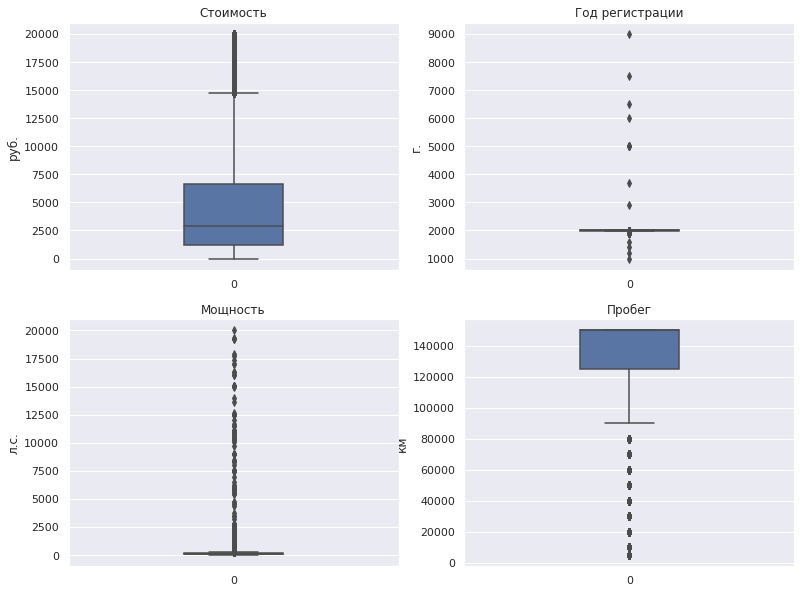

In [15]:
#Усатые ящики 
sns.set(rc={'figure.figsize':(13, 10)})

plt.subplot(2, 2, 1)
sns.boxplot(data=df['Price'], width=0.3)
plt.title('Стоимость')
plt.ylabel('руб.')

plt.subplot(2, 2, 2)
sns.boxplot(data=df['RegistrationYear'], width=0.3)
plt.title('Год регистрации')
plt.ylabel('г.')

plt.subplot(2, 2, 3)
sns.boxplot(data=df['Power'], width=0.3)
plt.title('Мощность')
plt.ylabel('л.с.')

plt.subplot(2, 2, 4)
sns.boxplot(data=df['Kilometer'], width=0.3)
plt.title('Пробег')
plt.ylabel('км')
plt.show()

Графики также подтверждают наличие выбросов, от которых необходимо избавиться, конечно мы можем потерять экслюзивные данные о стоимости автомобилей, имеющих историческую стоимость, но так как наша база в большей мере предназначена для автомобилей широкого потребления, то потеря данной информации наоборот сделает нашу модель точнее. А к раритетам необходимо подходить индивидуально.

In [16]:
#Фильтрация данных
data = df[(df['Power'] < 400) & (df['Power'] > 20)]
data = data[(data['RegistrationYear'] < 2020) & (data['RegistrationYear'] > 1980)]
data = data[data['Price'] > 300]

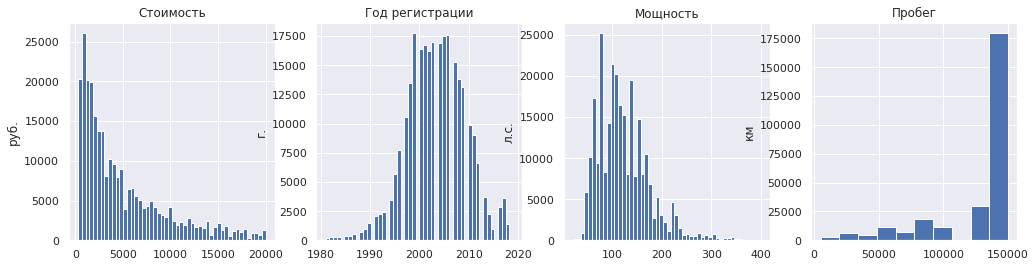

In [17]:
#Гистограммы распределений 
sns.set(rc={'figure.figsize':(17, 4)})

plt.subplot(1, 4, 1)
data['Price'].hist(bins=50)
plt.title('Стоимость')
plt.ylabel('руб.')

plt.subplot(1, 4, 2)
data['RegistrationYear'].hist(bins=50)
plt.title('Год регистрации')
plt.ylabel('г.')

plt.subplot(1, 4, 3)
data['Power'].hist(bins=50)
plt.title('Мощность')
plt.ylabel('л.с.')

plt.subplot(1, 4, 4)
data['Kilometer'].hist(bins=10)
plt.title('Пробег')
plt.ylabel('км')
plt.show()

In [18]:
#Доля (%) пропусков после фильтрации
data.isna().mean() * 100

Price                 0.000000
VehicleType           3.430438
RegistrationYear      0.000000
Gearbox               1.051922
Power                 0.000000
Model                 2.367101
Kilometer             0.000000
RegistrationMonth     0.000000
FuelType              2.803408
Brand                 0.000000
NotRepaired          13.560115
DateCreated           0.000000
dtype: float64

### Оценка возможности восстановления пропусков данных

Так как после удаления аномалий в данных все равно присутствуют пропуски, то оценим возможность восстановления данных путем использования методов классификации.

In [19]:
%%time
#Копия датафрейма
dt = data.copy()

CPU times: user 11.7 ms, sys: 2.07 ms, total: 13.8 ms
Wall time: 13.1 ms


In [20]:
#Удалим столбцы данные, которых не требуется восстанавливать
dt = dt.drop(['Price', 'Kilometer', 'DateCreated', 'NotRepaired', 'RegistrationYear'], axis=1)
#dt = dt.drop_duplicates().reset_index(drop=True)
dt.head()

,VehicleType,Gearbox,Power,Model,RegistrationMonth,FuelType,Brand
1,coupe,manual,190,NaN,5,gasoline,audi
2,suv,auto,163,grand,8,gasoline,jeep
3,small,manual,75,golf,6,petrol,volkswagen
4,small,manual,69,fabia,7,gasoline,skoda
5,sedan,manual,102,3er,10,petrol,bmw


In [21]:
#Удалим пропуски данных, чтобы и логистическая регрессия могла работать
dt = dt.dropna().reset_index(drop=True)

In [22]:
#Выделим столбцы с категориальными переменными, положим, что столбец Power имеет числовой тип, хотя по логике это не так.
cat_dt = dt.select_dtypes(include=['object'])
cat_dt.head()
cat_dt.shape

(245381, 5)

In [23]:
#Закодируем категориальные переменные и заменим стоблцы в датафрейме dt соответствующими столбцами с 
#кодированными переменными
encoder_1 = OrdinalEncoder()
encoder_1.fit(cat_dt)
cat_dt_ordinal = encoder_1.transform(cat_dt)
dt_ordinal = pd.DataFrame(cat_dt_ordinal, columns=cat_dt.columns)
dt = dt.drop(dt_ordinal.columns, axis=1)
dt = dt.join(dt_ordinal)
dt.head()

,Power,RegistrationMonth,VehicleType,Gearbox,Model,FuelType,Brand
0,163,8,6.0,0.0,117.0,2.0,14.0
1,75,6,5.0,1.0,116.0,6.0,37.0
2,69,7,5.0,1.0,101.0,2.0,31.0
3,102,10,4.0,1.0,11.0,6.0,2.0
4,109,8,1.0,1.0,8.0,6.0,25.0


In [24]:
#Список переменных
variables=['VehicleType', 'Gearbox', 'Model', 'FuelType']

In [25]:
#Список из одной модели. Удалил модели которые показали худшие результаты или рушили ядро jupyter.
models = [KNeighborsClassifier(n_jobs=-1)]

In [27]:
%%time
#Оценка восстановления данных
for variable in variables:
    features_cls = dt.drop([variable], axis=1)
    target_cls = dt[variable]
    for model in models:
        features_train_cls, features_test_cls, target_train_cls, target_test_cls = train_test_split(features_cls, 
                                                                                                    target_cls, 
                                                                                                    test_size=0.25, 
                                                                                                    random_state=12345)
        model_cls = model.fit(features_train_cls, target_train_cls)
        print(f'Для переменной {variable} и модели {model}, качество восстановления данных составит {model_cls.score(features_test_cls, target_test_cls):0.3F}')

Для переменной VehicleType и модели KNeighborsClassifier(n_jobs=-1), качество восстановления данных составит 0.702
Для переменной Gearbox и модели KNeighborsClassifier(n_jobs=-1), качество восстановления данных составит 0.853
Для переменной Model и модели KNeighborsClassifier(n_jobs=-1), качество восстановления данных составит 0.695
Для переменной FuelType и модели KNeighborsClassifier(n_jobs=-1), качество восстановления данных составит 0.870
CPU times: user 16 s, sys: 309 ms, total: 16.3 s
Wall time: 12.3 s


Таким образом, используя KNeighborsClassifier можно в достаточно хорошей степени, но не так хорошо как требуется, восстановить данные и при этом получить ошибки, которые могут снизить качество конечной модели. Поэтому принимаем решение о удалении данных с пропусками. 

In [28]:
#Удаление всех пропусков
data = data.dropna().reset_index(drop=True)

In [29]:
#Проверка наличия пропусков
data.isna().mean()

Price                0.0
VehicleType          0.0
RegistrationYear     0.0
Gearbox              0.0
Power                0.0
Model                0.0
Kilometer            0.0
RegistrationMonth    0.0
FuelType             0.0
Brand                0.0
NotRepaired          0.0
DateCreated          0.0
dtype: float64

Пропусков и аномалий нет, данные чисты и готовы к работе

## Подготовка обучающих и тренировочных таблиц

### Выделение признаков и целевого признака из датафрейма

In [30]:
#Выделение месяца из даты подачи объявления и удаление исходного столбца
data['Month'] = data['DateCreated'].dt.month
data = data.drop(['DateCreated'], axis=1)
#data.head()

In [31]:
#Обучающая и целевая выборки
features = data.drop(['Price'], axis=1)
target = data['Price']

### Кодирование признаков

In [32]:
#Выбор категориальных переменных
cat_columns = data.select_dtypes(include=['object']).columns
cat_columns

Index(['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired'], dtype='object')

In [33]:
#Кодирование категориальных переменных
#encoder = OneHotEncoder()
encoder = OrdinalEncoder()
cat_data = encoder.fit_transform(data.select_dtypes(include=['object']))

In [34]:
#cat_data = pd.DataFrame(cat_data.toarray(), columns=encoder.get_feature_names())
cat_data = pd.DataFrame(cat_data, columns=cat_columns)

In [35]:
#Замена категориальных данных на кодированные
features = features.drop(cat_columns, axis=1)
features = features.join(cat_data)
features.head()

,RegistrationYear,Power,Kilometer,RegistrationMonth,Month,VehicleType,Gearbox,Model,FuelType,Brand,NotRepaired
0,2001,75,150000,6,3,5.0,1.0,116.0,6.0,37.0,0.0
1,2008,69,90000,7,3,5.0,1.0,101.0,2.0,31.0,0.0
2,1995,102,150000,10,4,4.0,1.0,11.0,6.0,2.0,1.0
3,2004,109,150000,8,4,1.0,1.0,8.0,6.0,25.0,0.0
4,2004,105,150000,12,3,4.0,1.0,10.0,6.0,19.0,0.0


### Разделение на обучающую и валидационную выборки

In [36]:
#Разделение выборок 
features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
                                                                  test_size=0.20, 
                                                                  random_state=12345)

In [37]:
display(features_train.shape)
display(target_train.shape)
display(features_valid.shape)
display(target_valid.shape)

(174251, 11)

(174251,)

(43563, 11)

(43563,)

## Применение модели регрессий для описания исходных данных

In [38]:
scaler = [('scaler', StandardScaler())]

In [44]:
models = [GradientBoostingRegressor(), 
          LGBMRegressor(n_jobs=-1), 
          CatBoostRegressor(verbose=False)]

In [42]:
models = [LGBMRegressor(n_jobs=-1)]

In [45]:
%%time
for model in models:
    pipeline_regr = make_pipeline(StandardScaler(), model)
    scores = cross_val_score(pipeline_regr, features_train, target_train, cv=4).mean()
#   print(scores)
    start_1 = time.time()
    model = pipeline_regr.fit(features_train, target_train)
    end_1 = time.time()
    start_2 = time.time()
    predict = pipeline_regr.predict(features_valid)
    end_2 = time.time()
    r2 = r2_score(target_valid, predict)
    rmse = mean_squared_error(target_valid, predict)**0.5
    print(f'Модель {model}: R2={r2:0.3}, RMSE={rmse:0.3}, time_learn={(end_1-start_1):0.3}s, time_predict={(end_2-start_2):0.3}s')

Модель Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor', GradientBoostingRegressor())]): R2=0.846, RMSE=1.83e+03, time_learn=17.4s, time_predict=0.0779s
Модель Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lgbmregressor', LGBMRegressor())]): R2=0.879, RMSE=1.62e+03, time_learn=1.68s, time_predict=0.214s
Модель Pipeline(steps=[('standardscaler', StandardScaler()),
                ('catboostregressor',
                 <catboost.core.CatBoostRegressor object at 0x7fa32c433090>)]): R2=0.893, RMSE=1.52e+03, time_learn=23.2s, time_predict=0.0669s
CPU times: user 4min 23s, sys: 2.74 s, total: 4min 25s
Wall time: 2min 54s


Модель (GradientBoostingRegressor(): R2=0.846, RMSE=1.83e+03, time_learn=12.8s, time_predict=0.065s
Модель  LGBMRegressor()): R2=0.879, RMSE=1.62e+03, time_learn=4.1s, time_predict=0.398s
Модель CatBoostRegressor: R2=0.893, RMSE=1.52e+03, time_learn=26.1s, time_predict=0.0455s

Результаты соревнований по коробочным версиям моделей :

-- в номинации **"Качество предсказания"** (по метрике RMSE) выиграли следующие модели:

- 1 место - модель CatBoostRegressor():  R2=0.893, RMSE=1.52e+03;

- 2 место - модель LGBMRegressor()): R2=0.879, RMSE=1.62e+03;

- 3 место - модель GradientBoostingRegressor(): R2=0.846, RMSE=1.83e+03.


-- в номинации **"Время предсказания"** выиграли следующие модели:

- 1 место - модель CatBoostRegressor(): time_predict=0.0455s;

- 2 место - модель GradientBoostingRegressor(): time_predict=0.065s;

- 3 место - LGBMRegressor(): time_predict=0.398s;



-- в номинации **"Время обучения"** выиграли следующие модели:

- 1 место - модель LGBMRegressor(): time_learn=4.1s;

- 2 место - GradientBoostingRegressor(): time_learn=12.8;

- 3 место - модель CatBoostRegressor(): time_learn=26.1.

### LGBMRegressor

#### LGBMRegressor  с улучшенными гиперпараметрами

In [46]:
#Задание параметров и диапазона варьирования для поиска оптимальной модели.
parametrs = {'lgbmregressor__learning_rate': [0.1, 0.3],
             'lgbmregressor__n_estimators': [100]}

In [47]:
pipeline_lgbmr = make_pipeline(StandardScaler(), LGBMRegressor())

In [48]:
#Поиск наилучших параметров модели.
grid_model_lgbmr = GridSearchCV(pipeline_lgbmr, 
                               parametrs, 
                               scoring='neg_mean_absolute_error', 
                               cv=4, n_jobs=-1)
grid_model_lgbmr.fit(features_train, target_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('lgbmregressor', LGBMRegressor())]),
             n_jobs=-1,
             param_grid={'lgbmregressor__learning_rate': [0.1, 0.3],
                         'lgbmregressor__n_estimators': [100]},
             scoring='neg_mean_absolute_error')

In [49]:
pipeline_lgbmr_best = make_pipeline(StandardScaler(), grid_model_lgbmr.best_estimator_)
start_1 = time.time()
model = pipeline_lgbmr_best.fit(features_train, target_train)
end_1 = time.time()
start_2 = time.time()
predict = pipeline_lgbmr_best.predict(features_valid)
end_2 = time.time()
r2 = r2_score(target_valid, predict)
rmse = mean_squared_error(target_valid, predict)**0.5
print(f'Модель {model}: R2={r2:0.3}, RMSE={rmse:0.3}, time_learn={(end_1-start_1):0.3}s, time_predict={(end_2-start_2):0.3}s')

Модель Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('lgbmregressor',
                                  LGBMRegressor(learning_rate=0.3))]))]): R2=0.889, RMSE=1.55e+03, time_learn=1.96s, time_predict=0.155s


Модель LGBMRegressor() с улучшенными гиперпараметрами показала следующие результаты: R2=0.889, RMSE=1.55e+03, time_learn=28.8s, time_predict=0.209s.

Модель LGBMRegressor(): R2=0.893, RMSE=1.54e+03, time_learn=4.15e+02s, time_predict=0.306s

### CatBoostRegressor

#### CatBoostRegressor для категориальных признаков без кодирования

In [50]:
#Разделение выборок на обучение и тест 
features_train_cat, features_test_cat, target_train_cat, target_test_cat = train_test_split(data.drop(['Price'], axis=1), 
                                                                                            data['Price'], 
                                                                                            test_size=0.25, 
                                                                                            random_state=12345)

In [51]:
display(features_train_cat.head())
#display(features_test_cat.head())

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,Month
29212,small,2003,manual,75,corsa,150000,2,petrol,opel,no,3
23017,small,2006,manual,68,fiesta,150000,5,gasoline,ford,no,3
144175,wagon,2003,auto,163,a4,150000,5,gasoline,audi,no,3
30656,sedan,1991,auto,75,golf,100000,3,petrol,volkswagen,no,3
173001,sedan,2007,manual,300,leon,125000,7,petrol,seat,no,3


In [52]:
cat_features = [0, 2, 4, 6, 7, 8, 9]
model = CatBoostRegressor(loss_function = 'RMSE',
                          eval_metric = 'R2', 
                          cat_features = cat_features, 
                          verbose=False)
grid = {'iterations': [250, 300],
        'learning_rate': [0.1, 0.2]}
model.grid_search(grid, features_train_cat, target_train_cat)


bestTest = 0.8863305523
bestIteration = 249

0:	loss: 0.8863306	best: 0.8863306 (0)	total: 35.5s	remaining: 1m 46s

bestTest = 0.8916993056
bestIteration = 249

1:	loss: 0.8916993	best: 0.8916993 (1)	total: 1m 10s	remaining: 1m 10s

bestTest = 0.8882385116
bestIteration = 299

2:	loss: 0.8882385	best: 0.8916993 (1)	total: 1m 51s	remaining: 37.3s

bestTest = 0.892737415
bestIteration = 298

3:	loss: 0.8927374	best: 0.8927374 (3)	total: 2m 33s	remaining: 0us
Estimating final quality...
Training on fold [0/3]

bestTest = 0.8897435045
bestIteration = 299

Training on fold [1/3]

bestTest = 0.8918065716
bestIteration = 299

Training on fold [2/3]

bestTest = 0.8936528823
bestIteration = 299



{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [53]:
model.get_params()

{'cat_features': [0, 2, 4, 6, 7, 8, 9],
 'eval_metric': 'R2',
 'iterations': 300,
 'learning_rate': 0.2,
 'loss_function': 'RMSE',
 'verbose': False}

In [54]:
#Задание модели с оптимальными параметрами.
cat_features = [0, 2, 4, 6, 7, 8, 9]
model_cat = CatBoostRegressor(loss_function='RMSE', 
                                        eval_metric='R2', 
                                        iterations=300, 
                                        learning_rate=0.2,
                                        cat_features = cat_features,
                                        verbose=False)
start_1 = time.time()
model_cat.fit(features_train_cat, target_train_cat)
end_1 = time.time()
start_2 = time.time()
predictions = model_cat.predict(features_test_cat)
end_2 = time.time()
r2 = r2_score(target_test_cat, predictions)
rmse = mean_squared_error(target_test_cat, predictions)**0.5
print(f'Модель {model_cat}: R2={r2:0.3}, RMSE={rmse:0.3}, time_learn={(end_1-start_1):0.3}s, time_predict={(end_2-start_2):0.3}s')

Модель <catboost.core.CatBoostRegressor object at 0x7fa32c3632d0>: R2=0.89, RMSE=1.55e+03, time_learn=45.0s, time_predict=0.205s


Модель CatBoostRegressor() без предварительного кодирования категориальных переменных: R2=0.89, RMSE=1.55e+03, time_learn=52.7s, time_predict=0.276s

## Анализ моделей

1. Исходя из полученных результатов исследования и согласно требованиям заказчика лучшими моделями являются:

 - качество предсказания: 
    - CatBoostRegressor() RMSE=1.52e+03; 
    - LGBMRegressor() RMSE=1.62e+03;
   
 - скорость предсказания: 
    - CatBoostRegressor() time_predict=0.0455s; 
    - GradientBoostingRegressor() time_predict=0.065s;
    
 - время обучения: 
    - LGBMRegressor() time_learn=4.1s;
    - GradientBoostingRegressor() time_learn=12.8.
 
2. CatBoostRegressor поддерживает довольно простой (для пользователя) механизм работы с категориальными переменными.

3. По результатам проекта, по совокупности параметров заказчику было рекомендовано использовать модель CatBoostRegressor.